# Individual Planning Stage

https://github.com/YuanYuan-06/dsci-Individualplan.git

## Loading package

In [1]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Reading data

### reading "players" data

In [2]:
url_player = "http://drive.google.com/uc?export=download&id=1EHNNhxB-0P13COf3nGGV7hi2Y96ay5hq"
players <- read_csv(url_player)
head(players)
dim(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196   7

### reading "sessions" data

In [3]:
url_sessions = "http://drive.google.com/uc?export=download&id=19U6P0gnqzlpL4NFfIgrG9riMbup52klE"
sessions <- read_csv(url_sessions)
head(sessions)
dim(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.72e+12,1.72e+12


[1] 1535    5

## Data exploration

### exploring"players" data

In [4]:
distinct_experience <- distinct(players,experience)
distinct_subscribe <- distinct(players,subscribe)
distinct_gender<- distinct(players,gender)

distinct_experience
distinct_subscribe
distinct_gender

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


In [5]:
player_max<- players |>
summarize(across(c(played_hours,Age),~max(.x, na.rm=TRUE)),statistic = "max")

player_min<- players |>
summarize(across(c(played_hours,Age),~min(.x, na.rm=TRUE)),statistic = "min")

player_mean<- players |>
summarize(across(c(played_hours,Age),~mean(.x, na.rm=TRUE)),statistic = "mean")

player_max
player_min
player_mean

played_hours,Age,statistic
<dbl>,<dbl>,<chr>
223.1,58,max


played_hours,Age,statistic
<dbl>,<dbl>,<chr>
0,9,min


played_hours,Age,statistic
<dbl>,<dbl>,<chr>
5.845918,21.13918,mean


In [7]:
experience_frequency <- players|>
count(experience)|>
mutate(percent = n/sum(n) *100)|>
arrange(desc(n))

gender_frequency <- players|>
count(gender)|>
mutate(percent = n/sum(n) *100)|>
arrange(desc(n))

subscribe_frequency <- players|>
count(subscribe)|>
mutate(percent = n/sum(n) *100)|>
arrange(desc(n))

experience_frequency
gender_frequency
subscribe_frequency

experience,n,percent
<chr>,<int>,<dbl>
Amateur,63,32.142857
Veteran,48,24.489796
Regular,36,18.367347
Beginner,35,17.857143
Pro,14,7.142857


gender,n,percent
<chr>,<int>,<dbl>
Male,124,63.2653061
Female,37,18.8775510
Non-binary,15,7.6530612
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245
Agender,2,1.0204082
Other,1,0.5102041


subscribe,n,percent
<lgl>,<int>,<dbl>
TRUE,144,73.46939
FALSE,52,26.53061


### exploring "sessions" data

In [8]:
tidy_sessions <- sessions|>
separate (start_time, into=c("start_date","start_time"),sep=" ", convert = TRUE)|>
separate (end_time, into=c("end_date","end_time"),sep=" ", convert = TRUE)|>
separate (start_date, into=c("start_day","start_month","start_year"),sep="/", convert = TRUE)|>
separate (end_date, into=c("end_day","end_month","end_year"),sep="/", convert = TRUE)|>
separate (start_time, into=c("start_hour","start_minute"),sep=":", convert = TRUE)|>
separate (end_time, into=c("end_hour","end_minute"),sep=":", convert = TRUE)

head(tidy_sessions)


hashedEmail,start_day,start_month,start_year,start_hour,start_minute,end_day,end_month,end_year,end_hour,end_minute,original_start_time,original_end_time
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30,6,2024,18,12,30,6,2024,18,24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17,6,2024,23,33,17,6,2024,23,46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25,7,2024,17,34,25,7,2024,17,57,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25,7,2024,3,22,25,7,2024,3,58,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25,5,2024,16,1,25,5,2024,16,12,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23,6,2024,15,8,23,6,2024,17,10,1.72e+12,1.72e+12


In [9]:
player_hourly_count <- tidy_sessions|>
group_by(start_hour)|>
summarise(total_players = n_distinct(hashedEmail),
          total_sessions = n())|>
arrange(desc(total_players))

player_hourly_count

start_hour,total_players,total_sessions
<int>,<int>,<int>
21,29,91
3,27,131
0,26,128
4,26,151
2,25,152
19,25,58
22,25,89
23,23,122
5,21,88


## Data description

### describing "players" data

#### observations and variables

The data have 196 observations and 7 variables.  
The variables are:
1. `experience`(character): User's game experience level, consisting of `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`, with `Amateur` (32.14%) and `Pro` (7.14%) as the most and least frequent. 
2. `subscribe`(logical): Indicate whether the user has subscribed to the service, consisting of `TRUE` and `FALSE`. 73.47% players subscribed to game information, 26.53% did not.  
3. `hashedEmail`(character): Hashing encoded email, which is the encrypted form of the user's email address.
4. `played_hours`(double): User's online gaming time in hours, ranging from `0` to `223.1` hours, with a mean of 5.85 hours. 
5. `name`(character): Recorded user's name
6. `gender`(character): Recorded user's gender, consisting of `Male`, `Female`, `Non-binary`, `Prefer not to say`, `Agender`, `Two-Spirited`, and `Other`, with `Male` (63.27%) and `Other` (0.51%) as the most and least frequent. 
7. `Age`(double): Recorded user's age, ranging from `9` to `58`, with a mean of 21.14. 

#### Issues visible in the data

In [10]:
players_missing <- players|>
summarize(across(experience:Age, ~sum(is.na(.x))))
players_missing

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


1. The `Age` column has 2 missing values, which can cause bias when analyzing age.
2. Because `experience`, `gender`, and `subscribe` are categorical, they need to be converted into factors, ensuring they can be used as predictors or response variables.
3. The extreme values of `played_hours` and `Age` could indicate outliers.
4. In `experience` and `gender`, there is an imbalance between different categories. We might need to combine some categories, such as `Two-Spirited`, `Agender`, and `Other`. 

#### Potential issues not directly visible in the data

1. `Age` is reported by players themselves and might be inaccurate.
2. Players may remain online because of the network and system issues; thus, `played_hours`might be overestimated. 

### describing "sessions" data

#### observations and variables

The data have 1535 observations and 5 variables.  
The variables are:
1. `hashedEmail`(character): Hashing encoded email, which is the encrypted form of the user's email address.
2. `start_time`(character): Game session start time: date"`day/month/year`", time "`hour: minute`".
3. `end_time`(character): Game session end time: date"`day/month/year`", time "`hour: minute`".
4. `original_start_time`(double): Start timestamp (scientific notation). 
5. `original_end_time`(double): End timestamp (scientific notation).


#### Issues visible in the data

1. The `original_start_time` and `original_end_time` are redundant columns and might cause confusion.
2. Activity peaks at 3, 0, and 4 a.m. may result from players' different time zones, so it is necessary to clarify the data's base time zone. 

## Data visualization

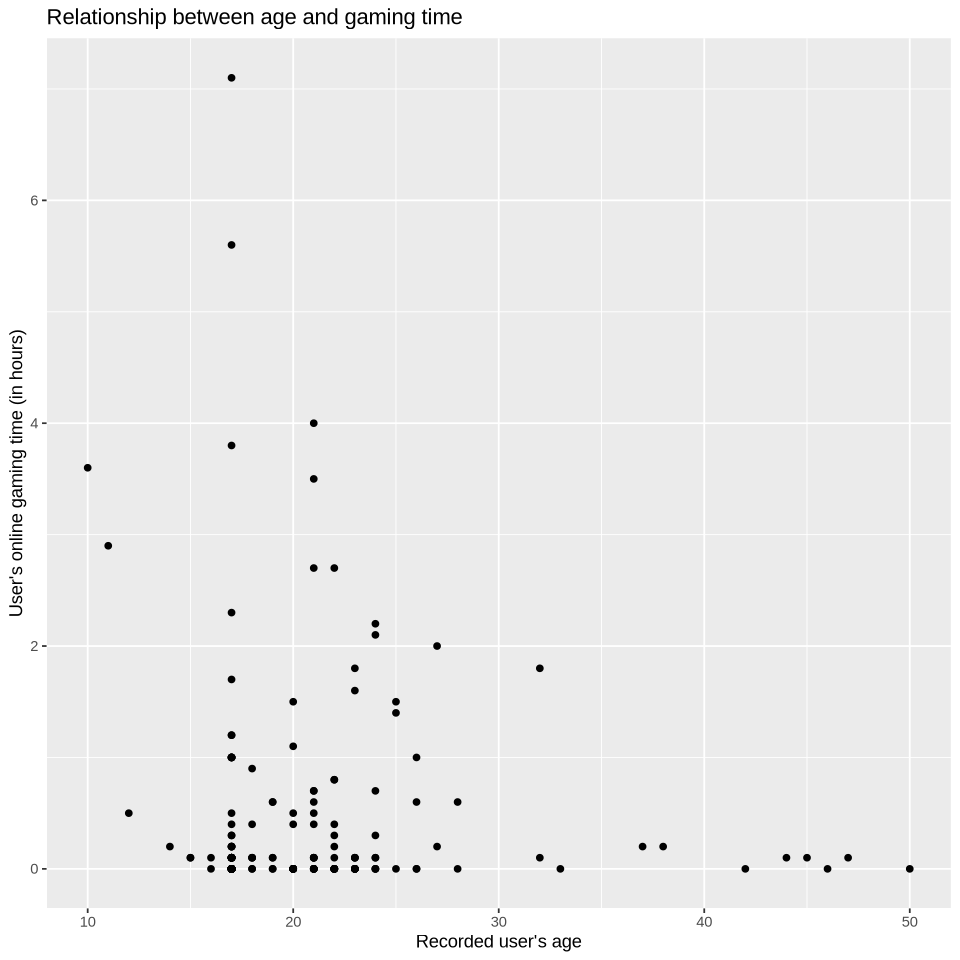

In [73]:
options(repr.plot.width=8, repr.plot.height =8)
players_age_playedhours <- players |>
filter(played_hours <= 10 & Age <= 50)|>
ggplot(aes(x=Age,y=played_hours))+
geom_point()+
labs(x="Recorded user's age", 
     y="User's online gaming time (in hours)", 
    title= "Relationship between age and gaming time")
players_age_playedhours

The younger demographic(aged 10-25) includes players who play for longer hours and are more likely to contribute to the data. 

In [74]:
players_experience_playedhours <- players|>
group_by(experience)|>
summarize(max=max(played_hours,na.rm=TRUE),
          min=min(played_hours,na.rm=TRUE),
          avg=mean(played_hours,na.rm=TRUE))
players_experience_playedhours

experience,max,min,avg
<chr>,<dbl>,<dbl>,<dbl>
Amateur,150.0,0,6.0174603
Beginner,23.7,0,1.2485714
Pro,30.3,0,2.6000000
Regular,223.1,0,18.2083333
Veteran,12.5,0,0.6479167


`Regular` players have the highest average playtime and maximum playtime. In contrast, `Veteran` players have the lowest average and maximum playtime.

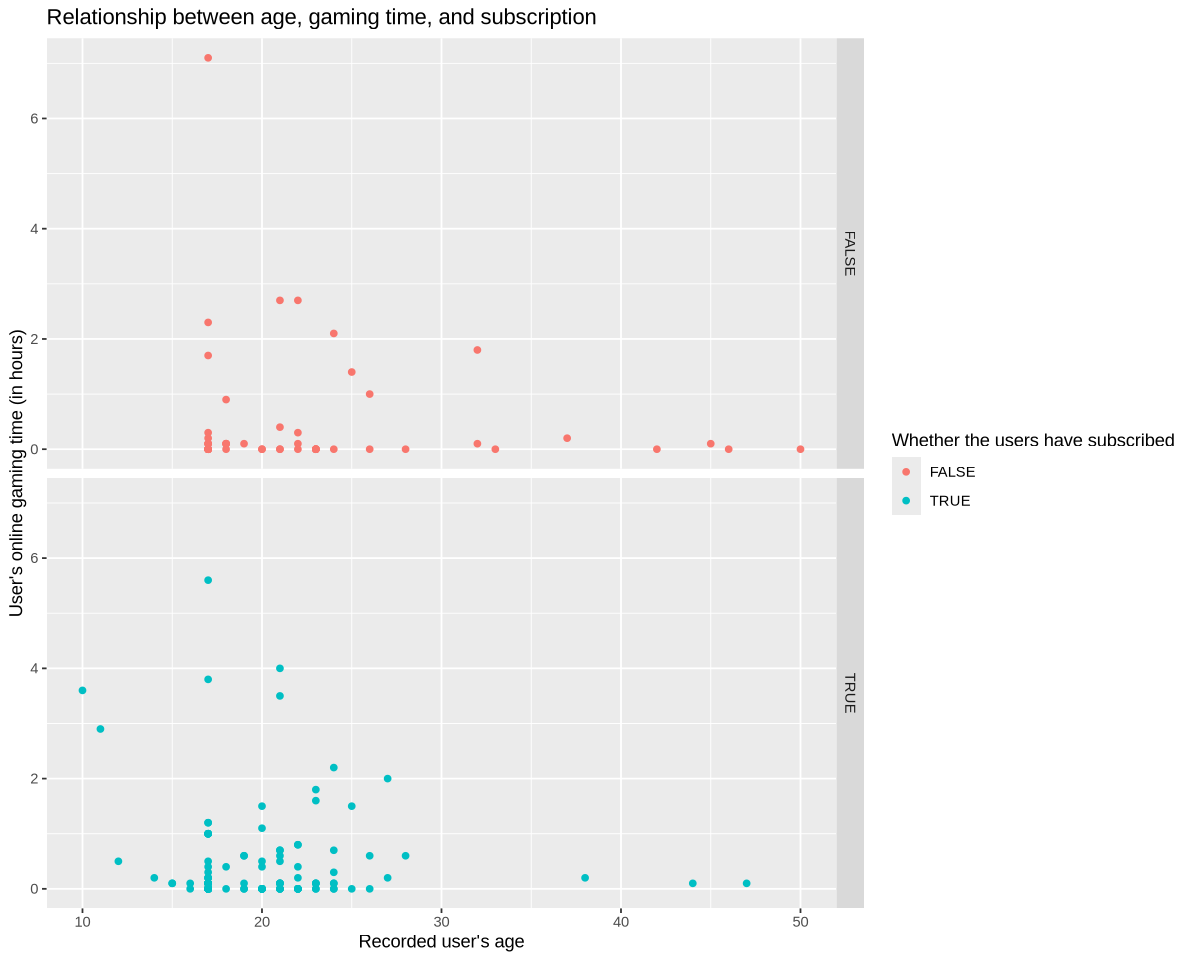

In [75]:
options(repr.plot.width=10, repr.plot.height = 8)
players_age_playedhours_subscribe <- players |>
filter(played_hours <= 10 & Age <= 50)|>
ggplot(aes(x=Age,y=played_hours))+
geom_point(aes(color=subscribe))+
labs(x="Recorded user's age", 
     y="User's online gaming time (in hours)", 
     color="Whether the users have subscribed",
    title= "Relationship between age, gaming time, and subscription")+
facet_grid(rows=vars(subscribe))

players_age_playedhours_subscribe

Subscribers to gaming information who are younger (aged 10-30) tend to spend more time playing the game. 

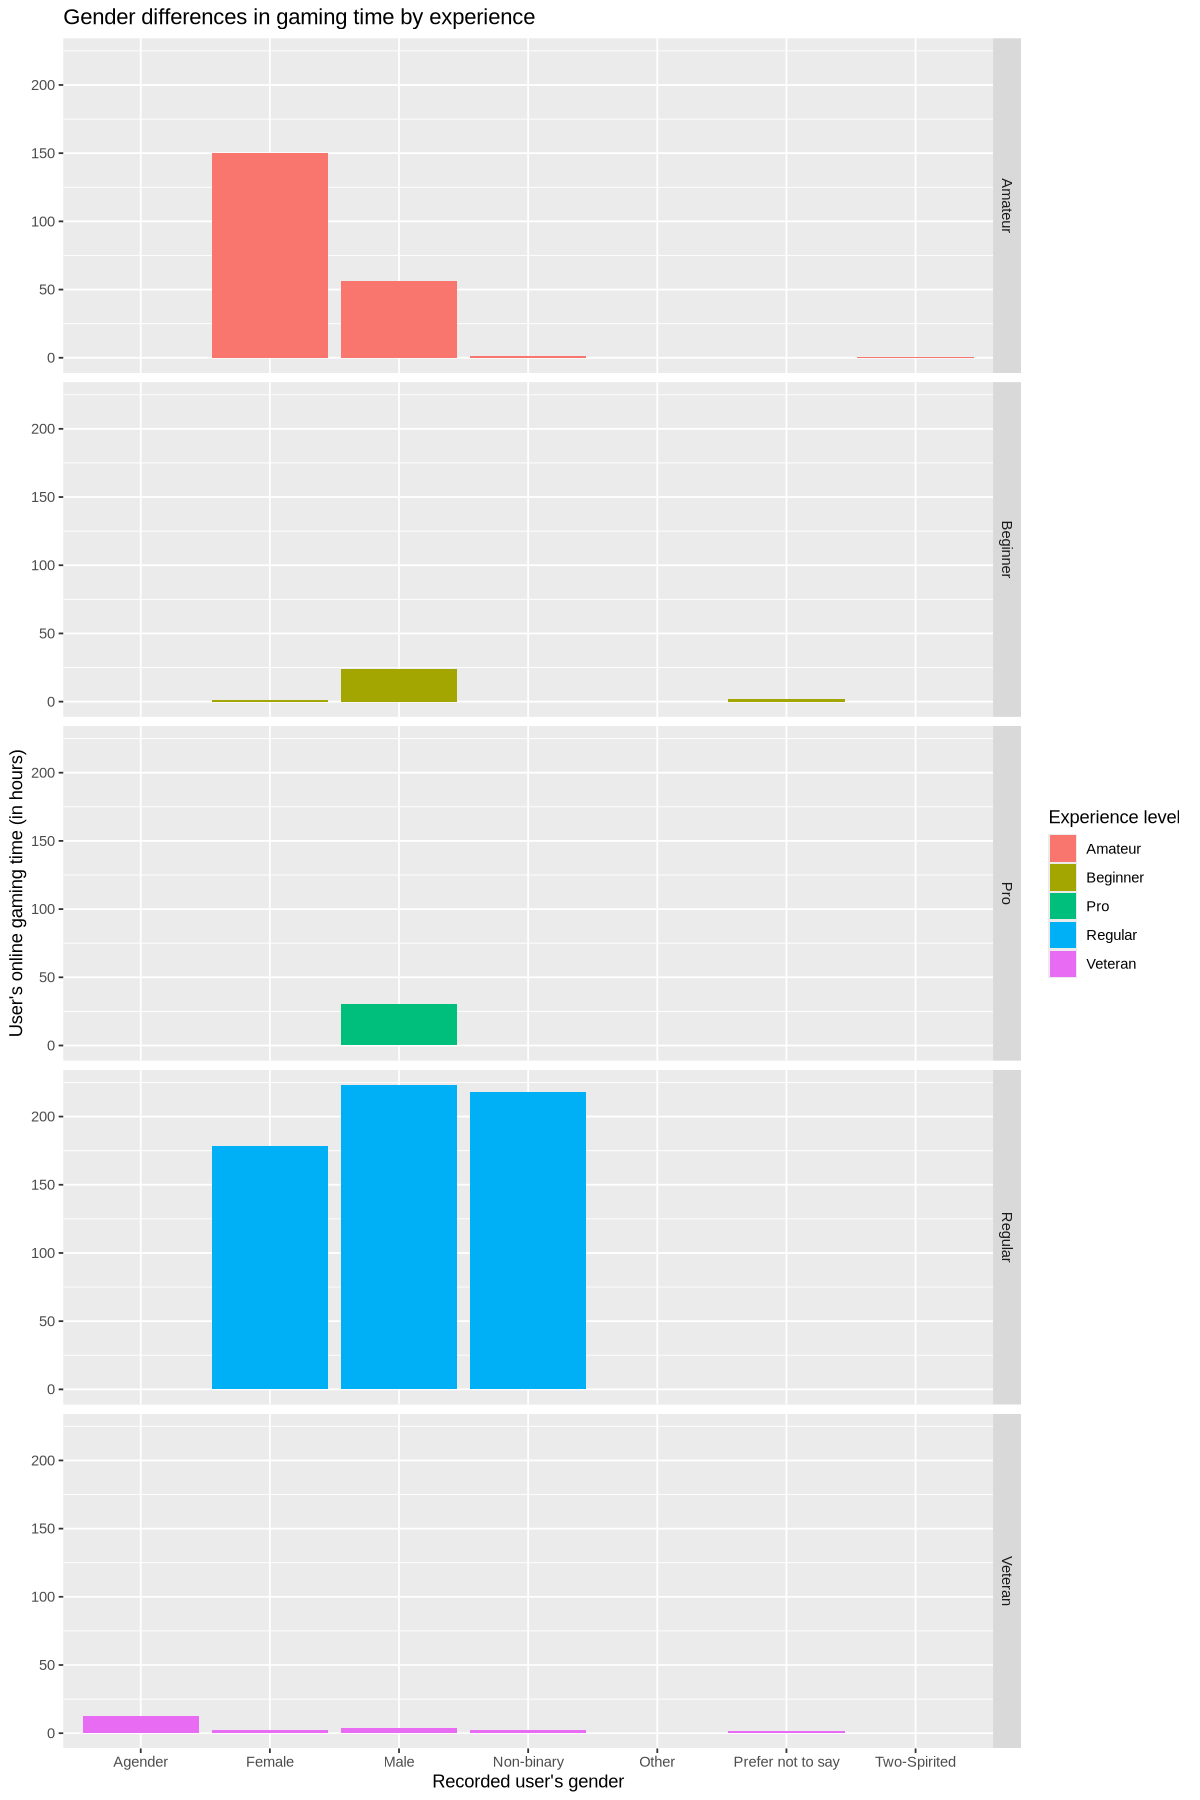

In [103]:
options(repr.plot.width=10, repr.plot.height = 15)
players_gender_playedtime_subscribe <- players |>
ggplot(aes(x=gender,y=played_hours))+
geom_col(aes(fill=experience),position="dodge")+
labs(x="Recorded user's gender", 
     y="User's online gaming time (in hours)",
     fill="Experience level",
    title= "Gender differences in gaming time by experience")+
facet_grid(rows=vars(experience))

players_gender_playedtime_subscribe

Among `regular` players with high gaming hours, the `male` gender is the most dominant group, most likely to contribute to the data. 

## Selected Question and Dataset

I will address Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

I selected `players.csv` as my dataset, as it contains the variables used in prediction.

The specific question is: "Can `experience` and `age` predict `played_hours` in `players.csv`?”

## Methods and Plan

Predictors: `experience` and `age`  
Response variable: `played_hours`

Because `played_hours` is a numerical variable, the question can be classified as a regression problem. So, I will use **regression**. 

Because I assume linear relationships between predictors and the response variable are weak, I will use **K-NN regression** to work with non-linear relationships. 

Because `experience` is categorical, I need to convert it into numerical values using **ordinary encoding**, assigning integer values (1-5) to `experience` levels based on inherent order.  

### Potential Limitations of K-NN Regression

The weaknesses are:  
1. Slow performance when training data gets larger.
2. Poor performance with multiple predictors.
3. Unable to predict values outsi the scope of the training data.

### Model

I will split the data into a 75% training set and a 25% testing set. Using 5-fold cross-validation on the training set to tune and find the best K that minimizes the RMSE. Then, I will retrain the training set using the optimal K value. Finally, I will use the testing set to find errors to evaluate the model's performance. This will be used to compare and refine the model.  